In [2]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier


# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')


In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [4]:
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

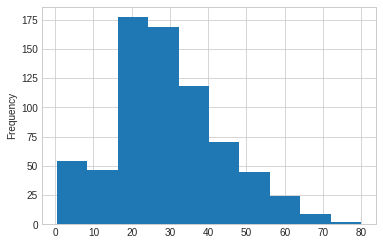

In [6]:
train.Age.plot.hist()

In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
len(train)

891

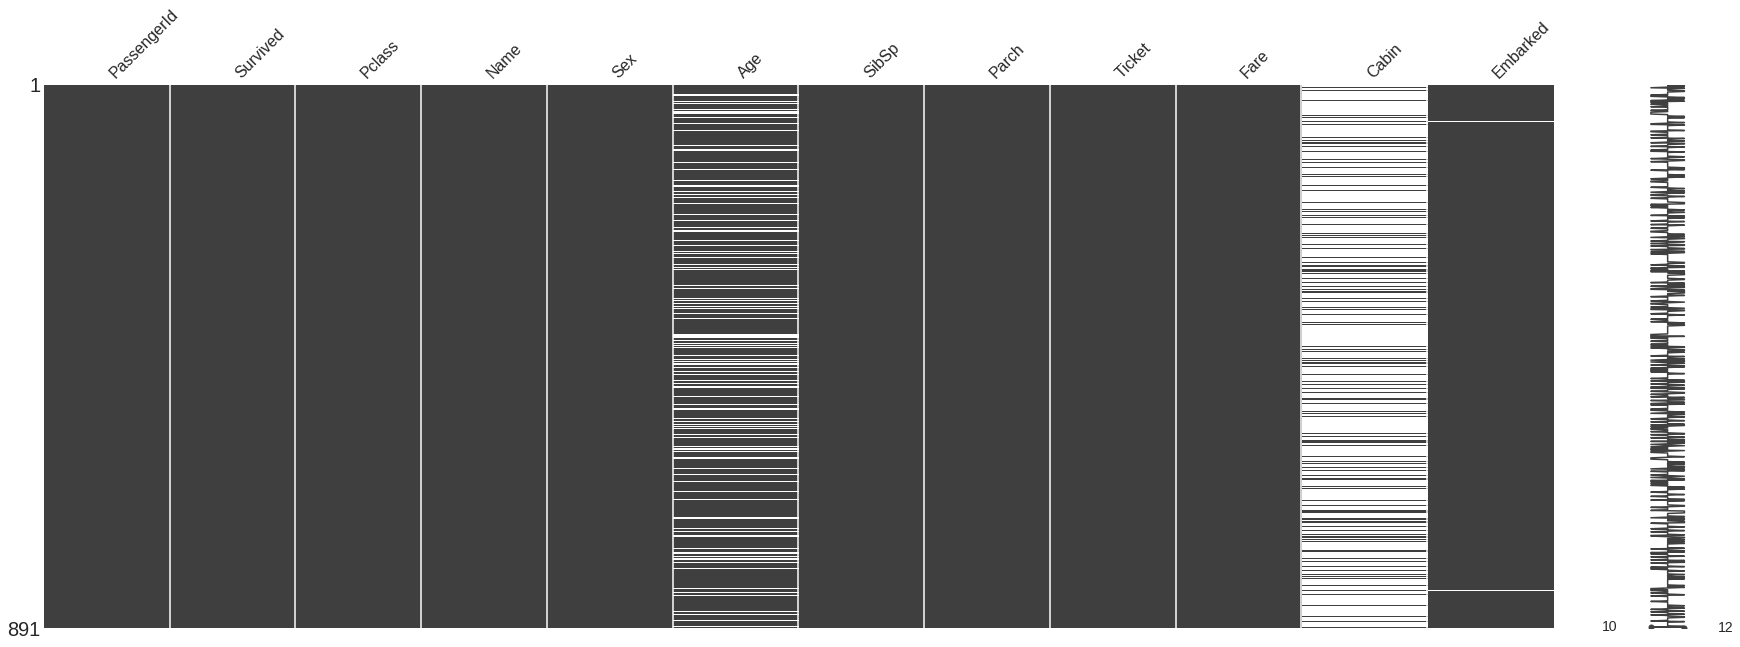

In [11]:
missingno.matrix(train,figsize=(30,10))

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df_bin = pd.DataFrame()
df_con= pd.DataFrame()

In [14]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


0    549
1    342
Name: Survived, dtype: int64


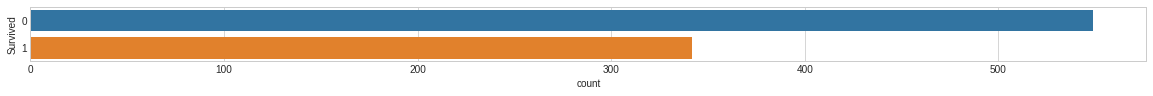

In [16]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y = 'Survived', data=train)
print(train.Survived.value_counts())

In [17]:
df_bin['Survived']= train['Survived']
df_con['Survived']= train ['Survived']

In [18]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [19]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


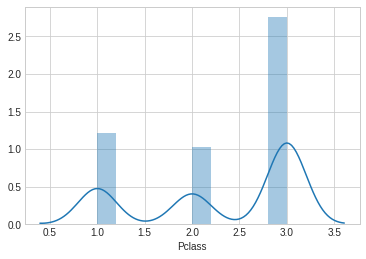

In [20]:
sns.distplot(train.Pclass)

In [21]:
train.Pclass.isnull().sum()

0

In [22]:
df_bin['Pclass']= train['Pclass']
df_con['Pclass'] = train[ 'Pclass']

In [23]:
train.Name.value_counts()

Penasco y Castellana, Mr. Victor de Satode                           1
Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")    1
Parrish, Mrs. (Lutie Davis)                                          1
Karun, Miss. Manca                                                   1
Banfield, Mr. Frederick James                                        1
                                                                    ..
Larsson, Mr. Bengt Edvin                                             1
Vestrom, Miss. Hulda Amanda Adolfina                                 1
Attalah, Miss. Malake                                                1
Vander Planke, Mr. Leo Edmondus                                      1
Tikkanen, Mr. Juho                                                   1
Name: Name, Length: 891, dtype: int64

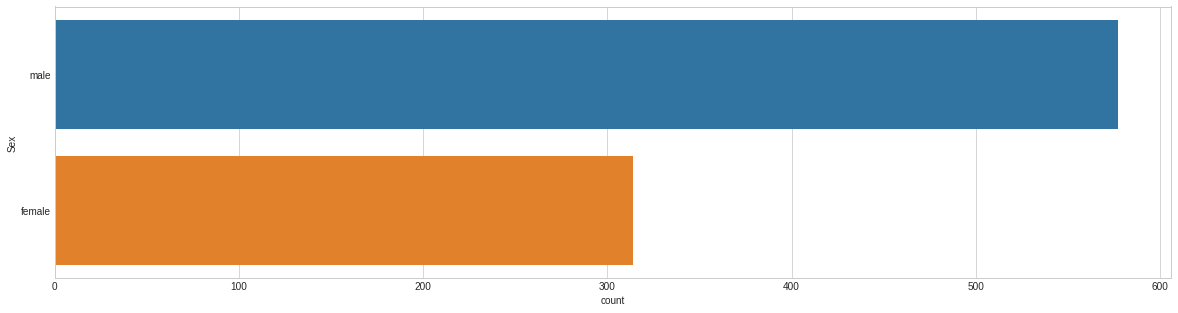

In [24]:
plt.figure(figsize=(20,5))
sns.countplot(y="Sex",data=train)

In [25]:
train.Sex.isnull().sum()

0

In [26]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [27]:
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0) # change sex to 0 for male and 1 for female

df_con['Sex'] = train['Sex']

In [28]:
df_con.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


In [29]:
df_bin.loc[df_bin['Survived']==1]['Sex']

1      1
2      1
3      1
8      1
9      1
      ..
875    1
879    1
880    1
887    1
889    0
Name: Sex, Length: 342, dtype: int64

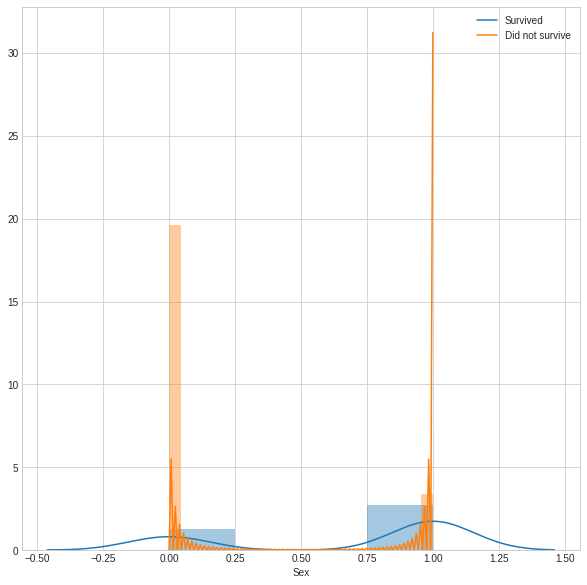

In [30]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});

In [31]:
train.Age.isnull().sum()

177

In [32]:
# Function to create count and distribution visualisation

def plot_count_dis(data, bin_df,label_column,target_column,figsize=(20,5),use_bin_df=False):
    if use_bin_df:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1,2,1)
        sns.countplot(y= target_column,data=bin_df);
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column]==1][target_column],
                     kde_kws={"label":"Survived"})
        sns.distplot(data.loc[data[label_column]==0][target_column],
                     kde_kws={"label":" Did not Survived"});
    else:
        fig= plt.figure(figsize=figsize)
        plt.subplot(1,2,1)
        sns.countplot(y=target_column,data=data)
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column]==1][target_column],
                    kde_kws={"label":"Survived"});
        sns.distplot(data.loc[data[label_column]==0][target_column],
                    kde_kws={"label":"Did not Survived"});

In [33]:
train.SibSp.isnull().sum()

0

In [34]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [35]:
df_bin['SibSp']= train['SibSp']

df_con['SibSp']= train['SibSp']

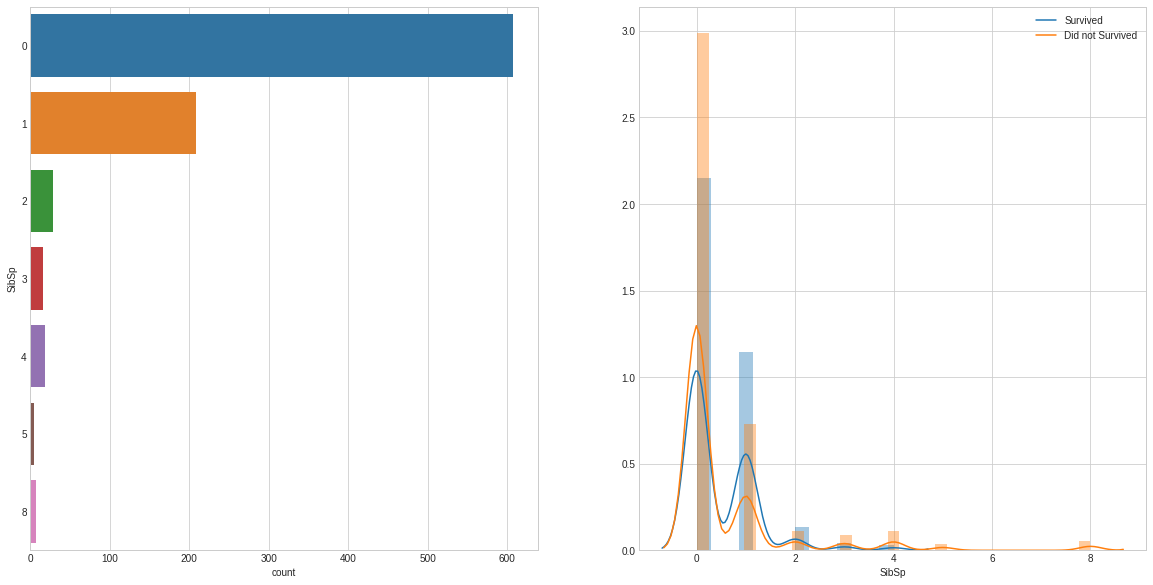

In [36]:
plot_count_dis(train,
               bin_df=df_bin,
               label_column='Survived',
               target_column='SibSp',
               figsize=(20,10))

In [37]:
train.Parch.isnull().sum()

0

In [38]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [39]:
df_bin['Parch']=train['Parch']
df_con['Parch']=train['Parch']

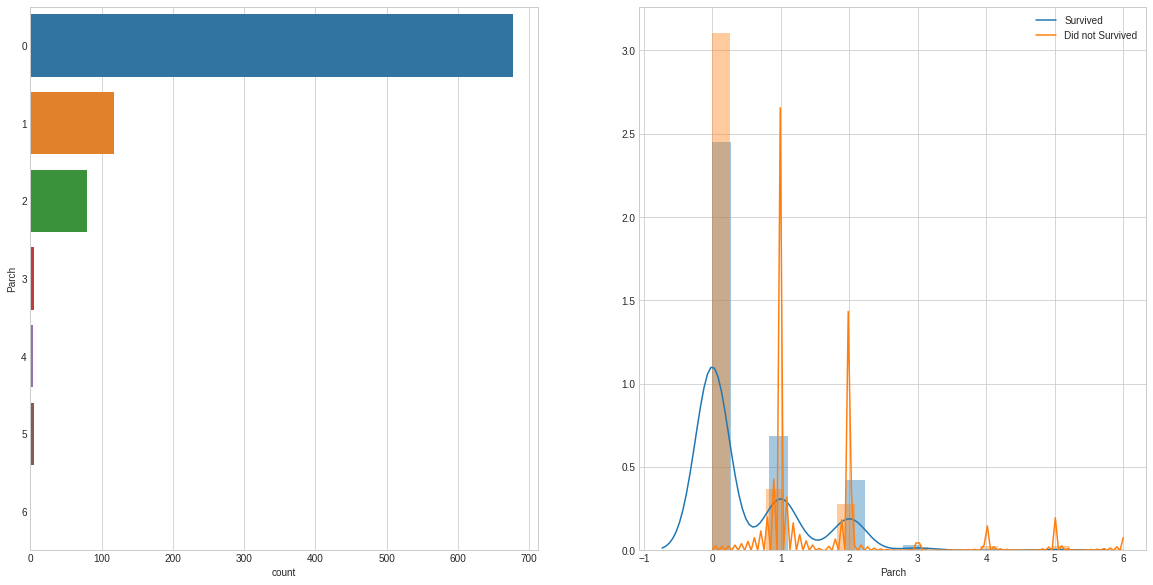

In [40]:
plot_count_dis(train,
              bin_df=df_bin,
              label_column='Survived',
              target_column='Parch',
              figsize=(20,10))

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


In [43]:
train.Ticket.isnull().sum()

0

In [44]:
train.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [45]:
train.Fare.isnull().sum()

0

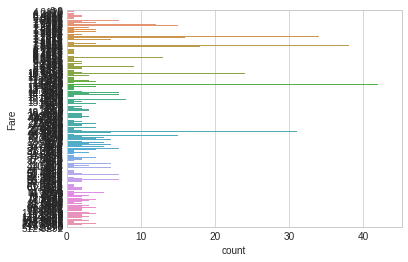

In [46]:
sns.countplot(y='Fare',data=train)

In [47]:
train.Fare.dtype

dtype('float64')

In [48]:
len(train.Fare.unique())

248

In [49]:
df_con['Fare']= train['Fare']

In [50]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500


In [51]:
df_bin['Fare']=pd.cut(train['Fare'],bins=5) # discretised

In [52]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,0,1,0,"(-0.512, 102.466]"
1,1,1,1,1,0,"(-0.512, 102.466]"
2,1,3,1,0,0,"(-0.512, 102.466]"
3,1,1,1,1,0,"(-0.512, 102.466]"
4,0,3,0,0,0,"(-0.512, 102.466]"


In [53]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

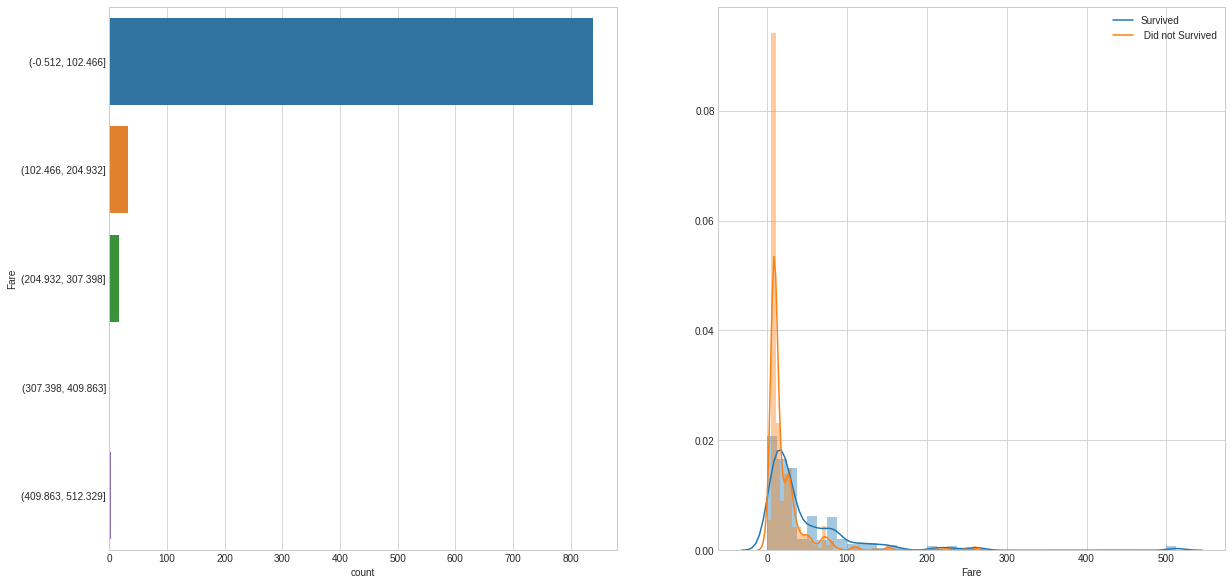

In [54]:
plot_count_dis(data=train,
              bin_df=df_bin,
              label_column='Survived',
              target_column='Fare',
              figsize=(20,10),
              use_bin_df=True)

In [55]:
train.Cabin.isnull().sum()

687

In [56]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
C22 C26        3
              ..
A7             1
E77            1
C110           1
D7             1
C30            1
Name: Cabin, Length: 147, dtype: int64

In [58]:
train.Embarked.isnull().sum()

2

In [59]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

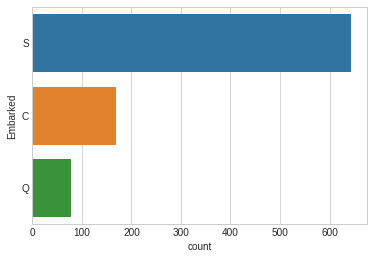

In [60]:
sns.countplot(y='Embarked',data=train)

In [61]:
df_bin['Embarked']=train['Embarked']
df_con['Embarked']=train['Embarked']

In [62]:
#remove Embarked rows which are missing values
print(len(df_con))
print(len(df_bin))
df_con=df_con.dropna(subset=['Embarked'])
df_bin=df_bin.dropna(subset=['Embarked'])
print(len(df_con))
print(len(df_bin))

891
891
889
889


In [63]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [64]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [65]:
#one- hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')

In [66]:
df_bin_enc=pd.get_dummies(df_bin,columns=one_hot_cols)

In [67]:
one_hot_cols

['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [68]:
df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [69]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [70]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [71]:
#one hot encode the categorical columns
df_enbarked_one_hot = pd.get_dummies(df_con['Embarked'],
                                    prefix='embarked')
df_sex_one_hot=pd.get_dummies(df_con['Sex'],
                             prefix='sex')
df_pclass_one_hot=pd.get_dummies(df_con['Pclass'],
                                prefix='pclass')

In [72]:
df_con_enc=pd.concat([df_con,df_enbarked_one_hot,
                     df_sex_one_hot,
                    df_pclass_one_hot],
                     axis=1)

In [73]:
df_con_enc.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,3,male,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,1,1,female,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,1,3,female,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,1,1,female,1,0,53.1000,S,0,0,1,1,0,1,0,0
4,0,3,male,0,0,8.0500,S,0,0,1,0,1,0,0,1


In [74]:
#drop the original categorical col
df_con_enc=df_con_enc.drop(['Pclass','Sex','Embarked'],axis=1)

In [75]:
#lets look at df_con_enc
df_con_enc.head(20)

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,1,0,30.0708,1,0,0,1,0,0,1,0


## start building machine learning Model 

In [76]:
#select the dataframe we want to use first for predictions
selected_df= df_con_enc

In [77]:
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [78]:
X_train = selected_df.drop('Survived',axis=1)

In [79]:
y_train= selected_df.Survived

In [80]:
X_train.shape

(889, 11)

In [81]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [82]:
y_train.shape

(889,)

In [83]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# logistic Regression 

In [84]:
log_mod = LogisticRegression().fit(X_train, y_train)
print('Accuracy of Logistic regression   classifier on training set: {:.4f}'
        .format(log_mod.score(X_train, y_train)*100))


Accuracy of Logistic regression   classifier on training set: 79.9775


In [85]:
log_cv=model_selection.cross_val_predict(LogisticRegression(),X_train,y_train,cv=10,n_jobs=-1)

In [86]:
 acc_cv = round(metrics.accuracy_score(y_train, log_cv)*100 , 2)

In [87]:
print("Accuracy CV 10-Fold: %s" % acc_cv)

Accuracy CV 10-Fold: 79.42


In [88]:
# Function that runs the requested algorithm and returns the accuracy mertrix
def fit_ml_algo(algo, X_train,y_train,cv):
    #One pass 
    model = algo.fit(X_train,y_train)
    #One pass accuracy
    acc=round(model.score(X_train,y_train)*100,2)
    #Cross Validation
    train_pred = model_selection.cross_val_predict(algo,
                                                   X_train,
                                                  y_train,
                                                  cv=cv,
                                                  n_jobs=-1)
    #Cross-validation accuracy metric
    acc_cv= round(metrics.accuracy_score(y_train,train_pred)*100,2)
    return train_pred,acc,acc_cv

In [89]:
#Logistic Regression
start_time=time.time()
train_pred_log, acc_log,acc_cv_log= fit_ml_algo(LogisticRegression(),
                                               X_train,
                                               y_train,
                                               10)
log_time = (time.time()-start_time)

print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:00.239309


### K- Nearest Neighbours

In [90]:
start_time= time.time()
train_pred_knn,acc_knn,acc_cv_knn=fit_ml_algo(KNeighborsClassifier(),
                                             X_train,
                                             y_train,
                                             10)
knn_time= (time.time()-start_time)
print("Accuracy:%s" %acc_knn)
print("Accuracy CV 10 -Fold: %s" %acc_cv_knn)
print("Running time %s"%datetime.timedelta(seconds=log_time))

Accuracy:83.46
Accuracy CV 10 -Fold: 76.72
Running time 0:00:00.239309


 # Gausian Navie Bayes

In [91]:
start_time = time.time()
traun_pred_gaussian,acc_gaussian,acc_cv_gaussian=fit_ml_algo(GaussianNB(),
                                                            X_train,
                                                            y_train,
                                                             10)
gaussian_time=(time.time()-start_time)
print("Accuracy:%s" %acc_gaussian)
print("Accuracy CV 10 -Fold: %s" %acc_cv_gaussian)
print("Running time %s"%datetime.timedelta(seconds=log_time))

Accuracy:78.52
Accuracy CV 10 -Fold: 77.95
Running time 0:00:00.239309


## Linear Support vector machine(SVM)

In [92]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 78.74
Accuracy CV 10-Fold: 78.18
Running Time: 0:00:00.822692


### Decision Tree Classifier

In [93]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.2
Running Time: 0:00:00.402965


### Gradient Boost Trees

In [94]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.61
Accuracy CV 10-Fold: 80.65
Running Time: 0:00:02.093146


In [95]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 75.59
Accuracy CV 10-Fold: 73.68
Running Time: 0:00:00.313049


### CatBoost Algorithm
CatBoost is a state-of-the-art open-source gradient boosting on decision trees library.

It's simple and easy to use. And is now regularly one of my go-to algorithms for any kind of machine learning task.

For more on CatBoost and the methods it uses to deal with categorical variables, check out the CatBoost docs.

In [96]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              ],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,92.46
6,Gradient Boosting Trees,86.61
0,KNN,83.46
1,Logistic Regression,79.98
4,Linear SVC,78.74
2,Naive Bayes,78.52
3,Stochastic Gradient Decent,75.59


In [97]:
log_cv=model_selection.cross_val_predict(LogisticRegression(),X_train,y_train,cv=10,n_jobs=-1)

In [116]:
test = pd.read_csv('data/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [117]:
test_embarked_one_hot=pd.get_dummies(test['Embarked'],
                                    prefix='embarked')
test_sex_one_hot=pd.get_dummies(test['Sex'],
                               prefix='sex')
test_pclass_one_hot=pd.get_dummies(test['Pclass'],
                                  prefix='pclass')

In [118]:
test=pd.concat([test,
               test_embarked_one_hot,
               test_sex_one_hot,
               test_pclass_one_hot],axis=1)

In [119]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [120]:
wanted_test_columns=X_train.columns
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [121]:
log_mod = LogisticRegression().fit(X_train, y_train)
#predictions= log_mod.predict(test[wanted_test_columns])

In [122]:
test[wanted_test_columns]

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,0,7.8292,0,1,0,0,1,0,0,1
1,1,0,7.0000,0,0,1,1,0,0,0,1
2,0,0,9.6875,0,1,0,0,1,0,1,0
3,0,0,8.6625,0,0,1,0,1,0,0,1
4,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,8.0500,0,0,1,0,1,0,0,1
414,0,0,108.9000,1,0,0,1,0,1,0,0
415,0,0,7.2500,0,0,1,0,1,0,0,1
416,0,0,8.0500,0,0,1,0,1,0,0,1


In [123]:
predictions= log_mod.predict(test[wanted_test_columns])

In [124]:
predictions[:20]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1])

In [125]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [126]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [127]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.
